# Лабoраторная работа 3
## Белоцкий Дмитрий 853504 (3 вариант)
# Имитация систем непрерывных и дискретных случайных величин

In [151]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

$$ f(x,y) = \frac{1}{9\pi} ( 3 - \sqrt{x^{2} + y^{2}} ) \forall x, y: x^{2} + y^{2} \le 9$$

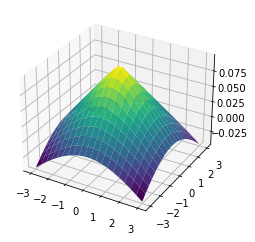

In [152]:
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)

X, Y = np.meshgrid(x, y)
Z = 1 / (9* np.pi) * (3 - np.sqrt(np.power(X, 2) + np.power(Y, 2)))

'''
fig2 = plt.figure()
N,x_bins,y_bins,_ = plt.hist2d(x_y_points[0], x_y_points[1], bins=30)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
plt.show()
'''

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.show()

#### Перейдем к полярной системе координат:
$$ f(\rho,\phi) = \frac{1}{9\pi} ( 3 - \rho ) \forall \rho,\phi: 0 \le \rho \le 3, \phi \in\left[0;2\pi\right] $$

При переходе к полярным координатам получили в качестве плотности распределения линейную функцию, что значительно успростит интегрирование, а значит предпочтительней воспользоваться методом обратной функции для определения $ f(\rho) $

$$ 
    f(\rho) = \int_{0}^{2 \pi} f(\rho,\phi) d \phi = \frac{2}{9}(3 - \rho)
$$
$$
    F(\rho) = \int_{0}^{\rho} f(\rho,\phi) = \frac{\rho ^ 2}{9} - \frac{2 \rho}{3}
$$

Определим обратную функцию: $$ \rho = 3 (1 - \sqrt{1 - R_1}) $$

$$ f(\phi / \rho) = \frac{f(\rho,\phi)}{f(\rho)} = \frac{1} {2\pi} $$
Отсюда используя метод обратной функции (можно сразу сказать, что функция равномерно распределена и не зависит от $\rho$) получим: $$ \phi = 2\pi R_2$$

Вернемся к исходным координатам x и y: $$ \begin{cases} x = \rho \cos{\phi} =  3 (1 - \sqrt{1 - R_1}) \cos{(2\pi R_2)}\\  y = \rho \sin{\phi =3 (1 - \sqrt{1 - R_1})  sin{(2\pi R_2)}}\end{cases} $$

In [153]:
def f(x, y):
    return 1 / (9 * math.pi) * (3 - math.sqrt(x**2 + y**2))

def f_x(x):
    t = math.sqrt(9 - x **2)
    return (- x ** 2 * math.asinh(t / np.abs(x)) + 3 * t)  / (9 * math.pi) 

def f_y(y):
    return f_x(y)

Гистограмма относительно X 


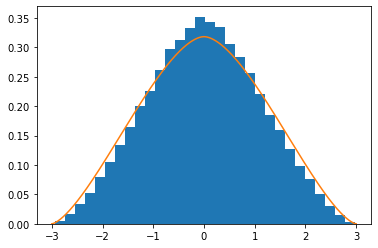

In [154]:
def generatorXY():
    while True:
        r1 = math.sqrt(random.random())
        r2 = random.random()
        rho = 3 * (1 - math.sqrt(1-r1))
        phi = 2 * math.pi * r2
        x = rho * math.cos(phi)
        y = rho * math.sin(phi)
        yield x, y
        
x_y_points = [[],[]]
generator = generatorXY()
for _ in range(100000):
    x, y = next(generator)
    x_y_points[0].append(x)
    x_y_points[1].append(y)
    
print("Гистограмма относительно X ")
plt.hist(x_y_points[0], bins = 30, density=True)
x_ls = np.linspace(-3,3, 1000)
plt.plot(x_ls, [f_x(x) for x in x_ls])
plt.show()

## Имитация системы методом Неймана 

In [155]:
def neiman_method(N,a,b,f_max):
    x_,y_ = [],[]
    for i in range(N):
        while True:
            x = a + random.random() * (b-a)
            y = a + random.random() * (b-a)
            z = random.random() * f_max
            if f(x,y) > z and x**2 + y**2 <= 9:
                x_.append(x)
                y_.append(y)
                break
    return x_, y_

x_y_points = neiman_method(100000, -3, 3, f(0,0))

Гистограмма относительно X 


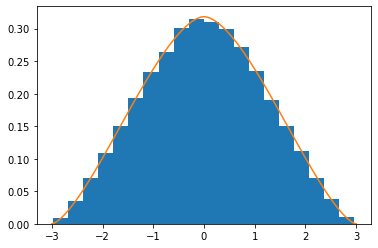

In [156]:
print("Гистограмма относительно X ")
plt.hist(x_y_points[0], bins = 20, density=True)
x_ls = np.linspace(-3,3, 1000)
plt.plot(x_ls, [f_x(x) for x in x_ls])
plt.show()

Гистограмма относительно Y 


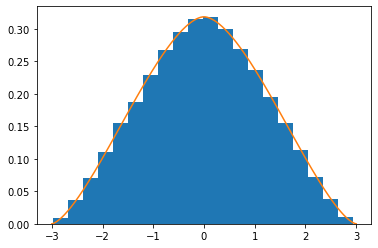

In [157]:
print("Гистограмма относительно Y ")
plt.hist(x_y_points[1], bins = 20, density=True)
y_ls = np.linspace(-3,3, 1000)
plt.plot(y_ls, [f_y(y) for y in y_ls])
plt.show()

# Точечная оценка 

In [158]:
print(f"M(x) = {np.mean(x_y_points[0])}")
print(f"M(y) = {np.mean(x_y_points[1])}")

print(f"D(x) = {np.var(x_y_points[0])}")
print(f"D(y) = {np.var(x_y_points[1])}")

print(f"Corr(x,y): {np.corrcoef(x_y_points[0],x_y_points[1])[0][1]}")

M(x) = 0.001389082512908761
M(y) = -0.0008401523873203749
D(x) = 1.3479213077782048
D(y) = 1.344665797876052
Corr(x,y): 0.003672176556184409


## Теоретическое значение матожидания
![](mo1.png)
![](mo2.png)
## Теоретическое значение дисперсии
![](dispersion1.png)
![](dispersion2.png)


## Интервальная оценка

In [160]:
import scipy.stats as st

def m_confidence_interval(m_x, d_x, N, confidence_level = 0.95):
    normal_quantil = st.norm.ppf(confidence_level)
    return [m_x - np.sqrt(d_x / N) * normal_quantil, m_x + np.sqrt(d_x / N) * normal_quantil]

def d_confidence_interval(d_x, N, confidence_level = 0.95):
    xi_plus, xi_minus = st.chi2.ppf((1-confidence_level)/2,N-1), st.chi2.ppf((1+confidence_level)/2,N-1)
    return ((N - 1) * d_x / xi_minus, (N - 1) * d_x / xi_plus)

def arth_p(r):
    if r == 1:
        r = 0.999999
    return np.log((1 + r) / (1 - r)) / 2.0

def th_z(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, n, alpha):
    z = arth_p(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = st.norm.ppf(1 - alpha/2) # квантиль
    lo = z - z_crit * se
    hi = z + z_crit * se
    return (th_z(lo), th_z(hi))

M_X = np.mean(x_y_points[0])
D_X = np.var(x_y_points[0])
print(f"M(x) {m_confidence_interval(M_X,D_X,len(x_y_points[0]))}")
print(f"D(x) {d_confidence_interval(D_X,len(x_y_points[0]))}")

M_Y =  np.mean(x_y_points[1])
D_Y = np.var(x_y_points[1])
print(f"M(Y) {m_confidence_interval(M_Y,D_Y,len(x_y_points[1]))}")
print(f"D(Y) {d_confidence_interval(D_Y,len(x_y_points[1]))}")
print(f"Corr(x,y) {r_confidence_interval(np.corrcoef(x_y_points[0],x_y_points[1])[0][1],len(x_y_points[0]),0.1)}")

M(x) [-0.004649840959776623, 0.007428005985594146]
D(x) (1.3361840041607844, 1.3598146692753523)
M(Y) [-0.006871778824185923, 0.005191474049545173]
D(Y) (1.3329568422845368, 1.3565304344351037)
Corr(x,y) (-0.0015293676477826784, 0.00887352205578917)


# Дискретная СВ

In [161]:
def check_if_independent(_matrix):
    matrix = np.array(_matrix)
    x_rows_count,y_columns_count = np.shape(matrix)
    x_p = [sum(x_row) for x_row in matrix]
    y_p = [sum(matrix[:,i]) for i in range(y_columns_count)]
    for i in range(x_rows_count):
        for j in range(y_columns_count):
            if np.abs(x_p[i]*y_p[j] - matrix[i,j]) > 10e-10 :
                return False
    return True

def find_dependent_x(_matrix):
    matrix = np.array(_matrix)
    _,y_columns_count = np.shape(matrix)
    y_p = [sum(matrix[:,i]) for i in range(y_columns_count)]
    dependent_dist = []
    for y_col_indx in range(y_columns_count):
        dependent_dist.append(matrix[:,y_col_indx]/y_p[y_col_indx])
    return np.transpose(dependent_dist)

def find_dependent_y(_matrix):
    matrix = np.array(_matrix)
    x_rows_count,y_columns_count = np.shape(matrix)
    x_p = [sum(x_row) for x_row in matrix]
    dependent_dist = []
    for x_row_indx in range(x_rows_count):
        dependent_dist.append(matrix[x_row_indx]/x_p[x_row_indx])
    return np.array(dependent_dist)

def matrix_x(matrix):
    return [sum(x_row) for x_row in matrix]

def matrix_y(matrix):
    _,y_columns_count = np.shape(matrix)
    return [sum(matrix[:,i]) for i in range(y_columns_count)]

def normalize_matrix(matrix):
    return matrix / np.sum(matrix)


## Ввод данных

In [166]:
''' 
------------------------------------------------
ВАРИАНТ ВВОДА РУКАМИ В ЮПИТЕРЕ

print('Введите длину вектора X')
size_x = int(input())
print('Введите длину вектора Y')
size_y = int(input())

matrix = np.empty(shape=(size_x, size_y), dtype=np.float64)
for _x in range(size_x):
    for _y in range(size_y):
        print(f'Введите matrix[{_x}, {_y}]')
        matrix[_x, _y] = np.float64(float(input()))
''' 
''' 
------------------------------------------------
ВАРИАНТ ИНИЦИАЛИЗАЦИИ МАССИВА В КОДЕ

matrix = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]])
'''

# ВАРИАНТ ИНИЦИАЛИЗАЦИИ ЧЕРЕЗ EXCEL
import pandas as pd
size = 3
matrix = np.array(pd.read_excel('input.xls'))
matrix = normalize_matrix(matrix)
print('Matrix : \n', matrix)
print('Матрица распределения Х : ', matrix_x(matrix))
print('Матрица распределения Y : ', matrix_y(matrix))
print('X и Y независимы : ', 'ДА' if check_if_independent(matrix) else 'НЕТ')
print("Условная матрица распределения X|Y \n: ", find_dependent_x(matrix))
print("Условная матрица распределения Y|X \n: ", find_dependent_y(matrix))

Matrix : 
 [[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]
 [0.         0.07692308 0.         0.         0.        ]
 [0.         0.         0.07692308 0.         0.        ]
 [0.         0.         0.         0.07692308 0.        ]
 [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]]
Матрица распределения Х :  [0.38461538461538464, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.38461538461538464]
Матрица распределения Y :  [0.15384615384615385, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.15384615384615385]
X и Y независимы :  НЕТ
Условная матрица распределения X|Y 
:  [[0.5        0.33333333 0.33333333 0.33333333 0.5       ]
 [0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.33333333 0.        ]
 [0.5        0.33333333 0.33333333 0.33333333 0.5       ]]
Условная матрица распределения Y|X 
:  [[0.2 0.2 0.2 0.2 0.2]
 [0.  1.  0.  0.

[0.38461538461538464, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.38461538461538464]
X


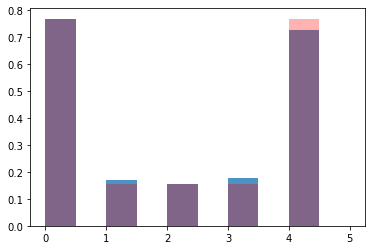

Y


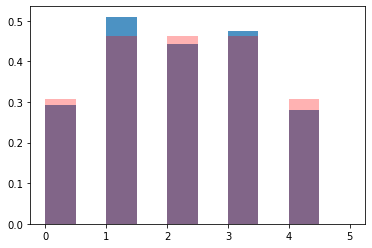

In [167]:
import random
import bisect
def discrete_vector_generator(_matrix):
    def _first(it,condition):
        return next(x for x in it if condition(x))
    def lot_method(p):
        _p = random.random()
        _cumsum = enumerate(np.cumsum(p))
        success_event = _first(_cumsum, lambda x : _p <=x[1])[0]
        return success_event

    matrix = np.array(_matrix)
    x_p = [sum(x_row) for x_row in matrix]
    y_dep = find_dependent_y(_matrix)
    print(x_p)
    while True:
        x_indx = lot_method(x_p)
        y_indx = lot_method(y_dep[x_indx])
        yield x_indx,y_indx

def get_p_x(_matrix):
    matrix = np.array(_matrix)
    x_p = [sum(x_row) for x_row in matrix]
    return x_p

def get_p_y(_matrix):
    matrix = np.array(_matrix)
    _,y_columns_count = np.shape(matrix)
    y_p = [sum(matrix[:,i]) for i in range(y_columns_count)]
    return y_p

gen = discrete_vector_generator(matrix)
seq = []

for i in range(1000):
    seq.append(next(gen))

x_seq = [s[0] for s in seq]
y_seq = [s[1] for s in seq]

p_x = get_p_x(matrix)
print("X")
plt.hist(x_seq, bins=10, range=(0, len(p_x)), density=True, alpha=0.8)
plt.hist(np.arange(0, len(p_x)), bins=10, range=(0, len(p_x)),
                                        density=True, weights=p_x, histtype='stepfilled',
                                       facecolor='red', linestyle='--', alpha=0.3)
plt.show()
print("Y")

p_y = get_p_y(matrix)
plt.hist(y_seq, bins=10, range=(0, len(p_y)), density=True, alpha=0.8)
plt.hist(np.arange(0, len(p_y)), bins=10, range=(0, len(p_y)),
                                        density=True, weights=p_y, histtype='stepfilled',
                                        facecolor='red', linestyle='--', alpha=0.3)
plt.show()

In [169]:
def get_theory_mean(p_values):
    return sum([i  * p for i, p in enumerate(p_values)])

def get_theory_d(p_values):
    exp_val = get_theory_mean(p_values)
    return sum([(i - exp_val) ** 2 * p for i, p in enumerate(p_values)])

def get_theory_corr(_matrix):
    p_x = get_p_x(_matrix)
    p_y = get_p_y(_matrix)
    mx, my = get_theory_mean(p_x), get_theory_mean(p_y)
    dx, dy = get_theory_d(p_x), get_theory_d(p_y)
    M_x = [i - mx for i in range(len(p_x))]
    M_y = [i - my for i in range(len(p_y))]
    M_XY = [[M_x[i] * M_y[j] * _matrix[i][j] for i in range(len(M_x))] for j in range(len(M_y))]
    cov = np.sum(M_XY)
    cor = cov / np.sqrt(dx * dy)
    return cor
    
    
mx, my = get_theory_mean(p_x), get_theory_mean(p_y)
dx, dy = get_theory_d(p_x), get_theory_d(p_y)

M_X = np.mean([vector[0] for vector in seq])
D_X = np.var([vector[0] for vector in seq])
M_Y =  np.mean([vector[1] for vector in seq])
D_Y = np.var([vector[1] for vector in seq])

print(f"MO (теоретическое): M(x)={mx} ,M(Y) ={my}")
print(f"МО (точечное): M(x) = {np.mean(x_seq)}, M(y) = {np.mean(y_seq)}")
print(f"МО (интервальное): M(x) {m_confidence_interval(M_X,D_X,len(seq))}, M(Y) {m_confidence_interval(M_Y,D_Y,len(seq))}")

print(f"D (теоретическая): D(X)={dx} ,D(Y) ={dy}")
print(f"D (точечная): D(x) = {np.var(x_seq)}, D(y) = {np.var(y_seq)}")
print(f"D (интервальная): D(x) interval {d_confidence_interval(D_X,len(seq))}, D(Y) interval {d_confidence_interval(D_Y,len(seq))}")

print(f"Теоретическая корреляция Corr(x,y): {get_theory_corr(matrix)}")
print(f"Точечная корреляция Corr(x,y): {np.corrcoef(x_seq,y_seq)[0][1]}")
print(f"Интервальная корреляция : {r_confidence_interval(np.corrcoef(x_seq,y_seq)[0][1],len(seq),0.1)}")

MO (теоретическое): M(x)=2.0 ,M(Y) =2.0
МО (точечное): M(x) = 1.964, M(y) = 1.97
МО (интервальное): M(x) [1.8714676046384318, 2.056532395361568], M(Y) [1.9034880905266476, 2.036511909473352]
D (теоретическая): D(X)=3.230769230769231 ,D(Y) =1.6923076923076925
D (точечная): D(x) = 3.1647039999999995, D(y) = 1.6351000000000002
D (интервальная): D(x) interval (2.9045262821588502, 3.461661929503536), D(Y) interval (1.500674604625879, 1.7885285388242418)
Теоретическая корреляция Corr(x,y): 0.06579516949597687
Точечная корреляция Corr(x,y): 0.13052711667786446
Интервальная корреляция : (0.07901795124337624, 0.18134115861446054)
